In [33]:
'''lifelines.readthedocs.org'''

'lifelines.readthedocs.org'

In [9]:
%matplotlib inline
from lifelines.datasets import load_waltons

In [2]:
df = load_waltons()

In [3]:
df.head()

,T,E,group
0,6,1,miR-137
1,13,1,miR-137
2,13,1,miR-137
3,13,1,miR-137
4,19,1,miR-137


In [6]:
from lifelines import KaplanMeierFitter 
kmf = KaplanMeierFitter()
kmf.fit(df['T'], event_observed = df['E'])

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

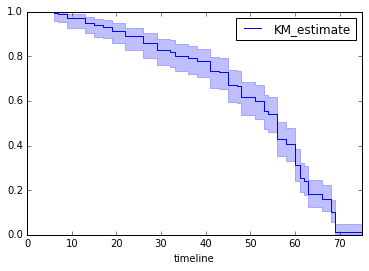

In [10]:
kmf.plot()

In [15]:
groups = df["group"]
index = groups == "miR-137"

In [16]:
index

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
Name: group, dtype: bool

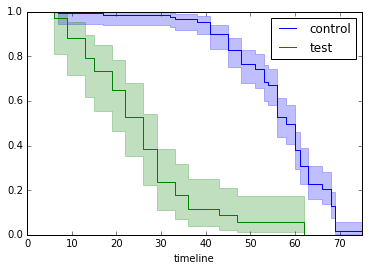

In [17]:
kmf.fit(df["T"][~index], df["E"][~index], label = "control")
ax = kmf.plot()
kmf.fit(df["T"][index], df["E"][index], label = "test")
kmf.plot(ax = ax)

In [18]:
from lifelines import CoxPHFitter

In [20]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()


,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


In [21]:
cf = CoxPHFitter()
cf.fit(regression_dataset, 'T', event_col = 'E')

/home/jakecoltman/anaconda3/lib/python3.5/site-packages/lifelines/fitters/coxph_fitter.py:285: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(duration_col, inplace=True)


<lifelines.CoxPHFitter: fitted with 200 observations, 11 censored>

In [23]:
cf.print_summary()

n=200, number of events=189

          coef  exp(coef)  se(coef)         z         p  lower 0.95  upper 0.95    
var1 2.084e-01  1.232e+00 6.991e-02 2.981e+00 2.876e-03   7.134e-02   3.455e-01  **
var2 4.601e-02  1.047e+00 7.507e-02 6.129e-01 5.400e-01  -1.012e-01   1.932e-01    
var3 2.110e-01  1.235e+00 7.314e-02 2.885e+00 3.913e-03   6.764e-02   3.544e-01  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580


In [26]:
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential
import numpy as np
N = 25
current_time = 10
actual_lifetimes = np.array([ [exponential(12), exponential(2)][uniform()<0.5] for i in range(N) ])

In [27]:
actual_lifetimes

array([  1.16142342,   0.4790155 ,   1.31090148,  37.06374192,
        22.19463719,   2.68333223,   4.06315728,   3.43179213,
        23.68602073,   1.72335068,  10.9426403 ,   0.51789161,
         1.47532664,  18.52243486,   1.0254639 ,   7.41586876,
         3.31066004,  56.9574817 ,   9.13282522,   0.43397634,
         6.40379054,   2.35288149,   3.06097357,   2.40818373,   0.47603332])

In [28]:
observed_lifetimes = np.minimum(actual_lifetimes, current_time)

In [29]:
observed_lifetimes

array([  1.16142342,   0.4790155 ,   1.31090148,  10.        ,
        10.        ,   2.68333223,   4.06315728,   3.43179213,
        10.        ,   1.72335068,  10.        ,   0.51789161,
         1.47532664,  10.        ,   1.0254639 ,   7.41586876,
         3.31066004,  10.        ,   9.13282522,   0.43397634,
         6.40379054,   2.35288149,   3.06097357,   2.40818373,   0.47603332])

In [30]:
observed = actual_lifetimes < current_time

In [31]:
observed

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True], dtype=bool)

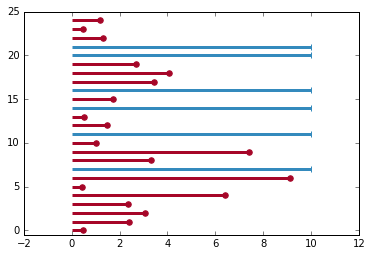

In [32]:
plot_lifetimes(observed_lifetimes, event_observed = observed)

Kaplan-Meier Estimate

$$\hat{S}(t) = \prod\frac{n_i - d_i}{n_i}$$

n_i => number of individuals at risk just before period t
d_i => number of deaths at period t

Estimating cumulative hazard:

$$\Lambda(t) = \int_{0}^{t} \lambda(t) dz$$

$$\hat{\Lambda}(t) = \sum\frac{d_i}{n_i} $$

Differential of the cumulative hazard function is an estimate of the hazard function.  Need to do some kernel smoothing

Survival regression: 

Two different methods: 
COx's proportional hazard model - l(t) = b_0(t) expt(b1 ... bnxn)
Aalen's additive model l(t) = b0(t) = b1(t)x1 ... + bn(t)xt

